In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e3/train.csv")

In [4]:
df_train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [6]:
df_train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [7]:
df_train.shape

(19219, 35)

In [8]:
df_train.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [9]:
df_train = df_train.drop(['id'], axis=1)

In [10]:
df_train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [11]:
df_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df_train['X_range'] = df_train['X_Maximum'] - df_train['X_Minimum']
df_train['Y_range'] = df_train['Y_Maximum'] - df_train['Y_Minimum']
df_train['Luminosity_range'] = df_train['Maximum_of_Luminosity'] - df_train['Minimum_of_Luminosity']


In [13]:
df_train.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_range,Y_range,Luminosity_range
0,584,590,909972,909977,16,8,5,2274,113,140,...,0,0,0,1,0,0,0,6,5,27
1,808,816,728350,728372,433,20,54,44478,70,111,...,0,0,0,0,0,0,1,8,22,41
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,0,0,1,0,0,0,0,153,68,112
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0,0,1,0,0,0,0,8,27,20
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0,0,0,0,0,0,1,20,45,29


In [14]:
df_train.columns[0]

'X_Minimum'

(array([2418., 3711.,  729., 1940., 1674., 1564., 2726., 2491.,  511.,
        1455.]),
 array([   4. ,  174.9,  345.8,  516.7,  687.6,  858.5, 1029.4, 1200.3,
        1371.2, 1542.1, 1713. ]),
 <BarContainer object of 10 artists>)

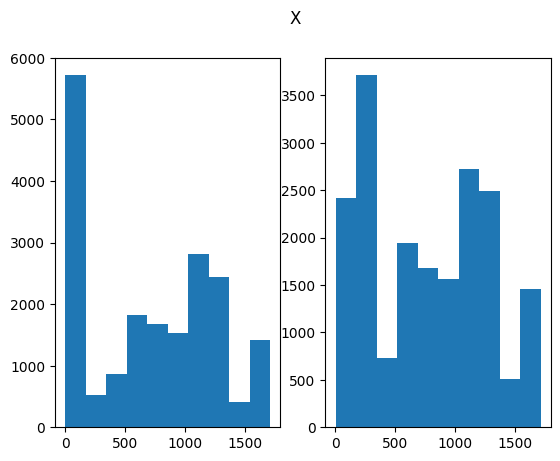

In [15]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('X')

ax1.hist(df_train["X_Minimum"])
ax2.hist(df_train["X_Maximum"])
#ax3.hist(df_train["X_range"])

(array([9101., 6183., 1865., 1036.,  395.,  255.,   28.,  136.,  152.,
          68.]),
 array([6.72400000e+03, 1.30482080e+06, 2.60291760e+06, 3.90101440e+06,
        5.19911120e+06, 6.49720800e+06, 7.79530480e+06, 9.09340160e+06,
        1.03914984e+07, 1.16895952e+07, 1.29876920e+07]),
 <BarContainer object of 10 artists>)

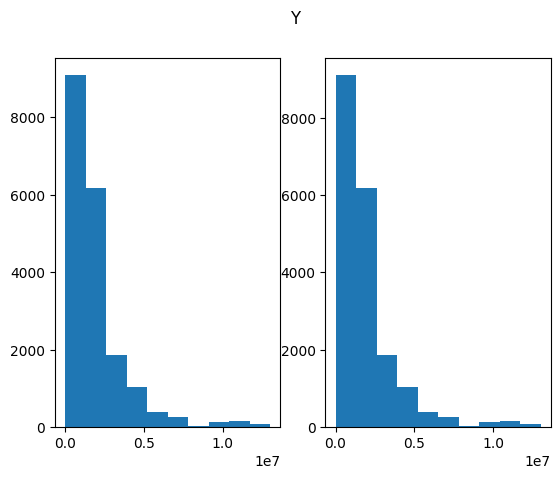

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Y')

ax1.hist(df_train["Y_Minimum"])
ax2.hist(df_train["Y_Maximum"])
#ax3.hist(df_train["Y_range"])

Text(0, 0.5, 'Y_Perimeter')

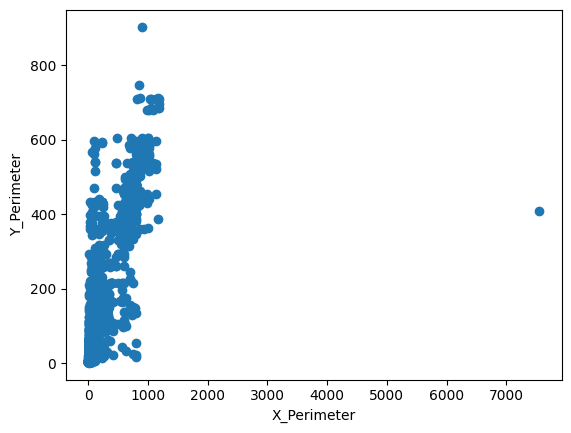

In [17]:
plt.scatter(df_train["X_Perimeter"],df_train["Y_Perimeter"])
plt.xlabel("X_Perimeter")
plt.ylabel("Y_Perimeter")

Text(0, 0.5, 'Edges_Y_Index')

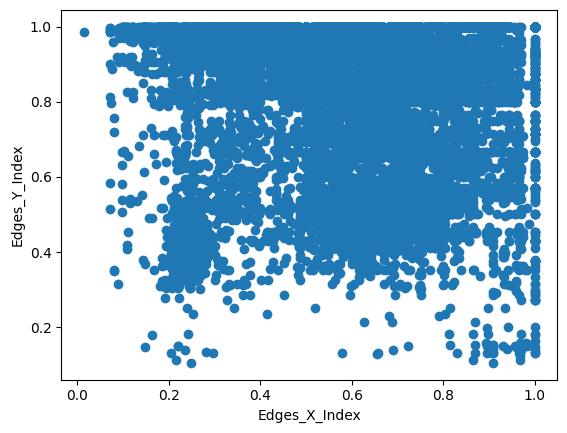

In [18]:
plt.scatter(df_train["Edges_X_Index"],df_train["Edges_Y_Index"])
plt.xlabel("Edges_X_Index")
plt.ylabel("Edges_Y_Index")

Text(0, 0.5, 'Log_Y_Index')

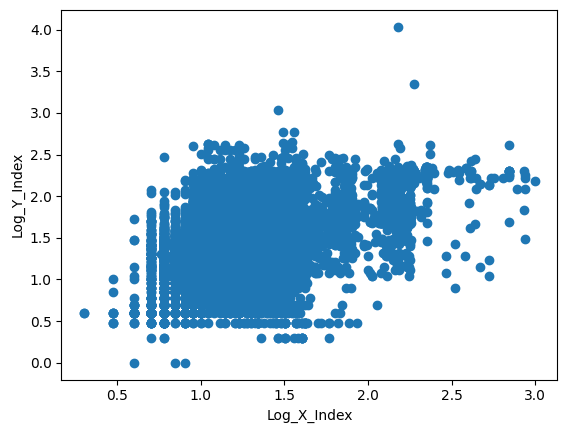

In [19]:
plt.scatter(df_train["Log_X_Index"],df_train["Log_Y_Index"])
plt.xlabel("Log_X_Index")
plt.ylabel("Log_Y_Index")

(array([1.0000e+00, 3.5000e+01, 8.1900e+02, 4.9400e+03, 1.2671e+04,
        4.5000e+02, 1.4400e+02, 1.2100e+02, 2.4000e+01, 1.4000e+01]),
 array([ 39. ,  60.4,  81.8, 103.2, 124.6, 146. , 167.4, 188.8, 210.2,
        231.6, 253. ]),
 <BarContainer object of 10 artists>)

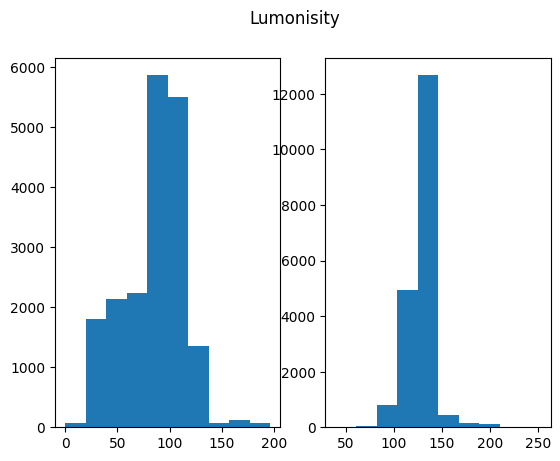

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Lumonisity')

ax1.hist(df_train["Minimum_of_Luminosity"])
ax2.hist(df_train["Maximum_of_Luminosity"])

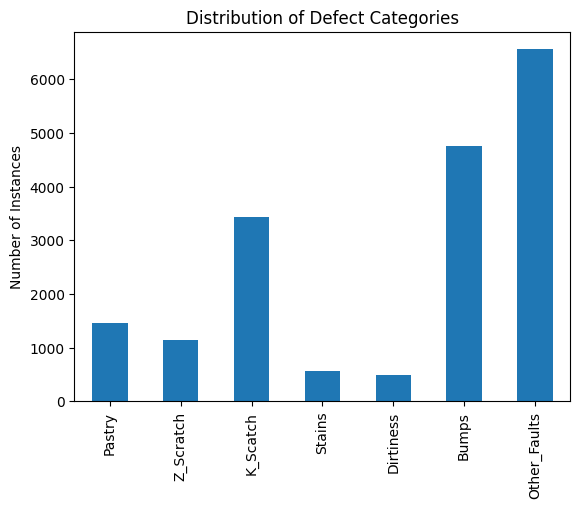

In [21]:
targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df_train[targets].sum().plot(kind='bar')
plt.title('Distribution of Defect Categories')
plt.ylabel('Number of Instances')
plt.show()

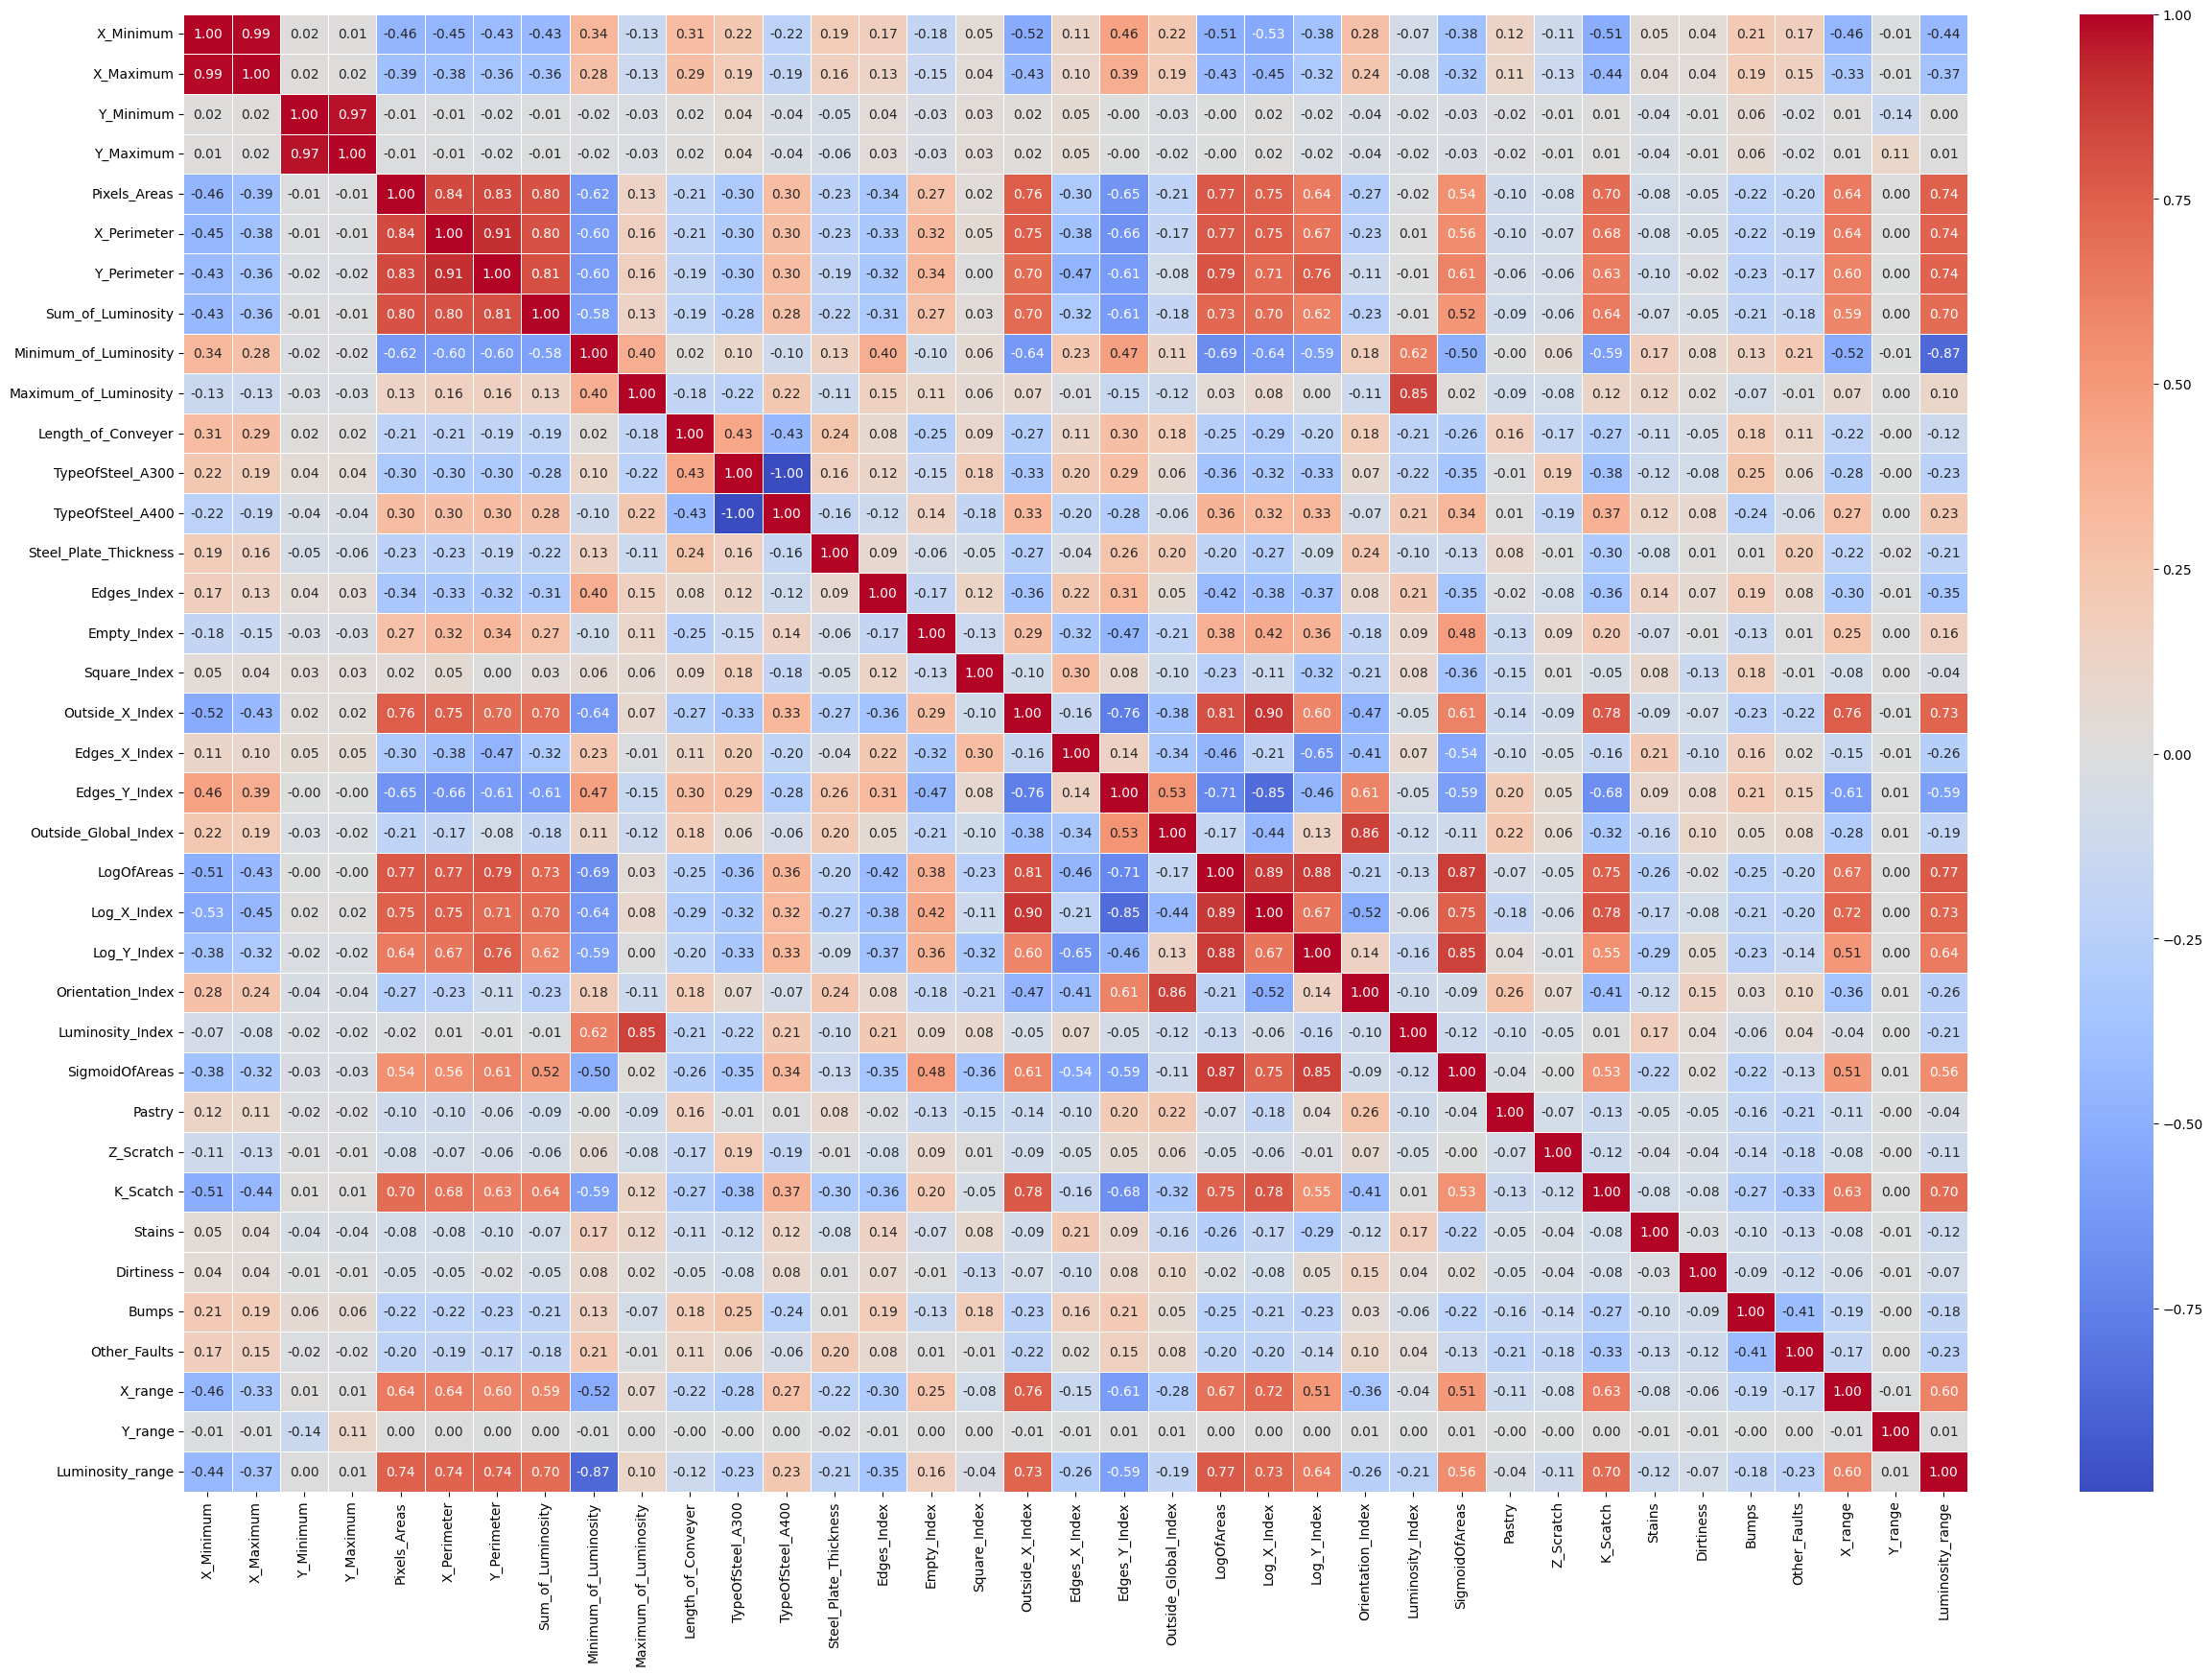

In [22]:
import seaborn as sns
df_corr = df_train[df_train.columns].dropna().corr()
plt.figure(figsize=(30, 20))

# Plot the heatmap
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

In [23]:
X = df_train.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1)
y = df_train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((15375, 30), (3844, 30), (15375, 7), (3844, 7))

In [27]:
X_scaler_train = X_train
X_scaler_val = X_val
#X_scaler_train = scaler.fit_transform(X_train)
#X_scaler_val = scaler.fit_transform(X_val)

In [28]:
X_scaler_train.shape, X_scaler_val.shape

((15375, 30), (3844, 30))

In [29]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK
from sklearn.metrics import accuracy_score
#model=xg.XGBClassifier()
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier()
# Define the hyperparameter space
space = {
    'max_depth': hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'learning_rate': hp.loguniform('learning_rate', -5, -2),
    'subsample': hp.uniform('subsample', 0.5, 1)
}

# Define the objective function to minimize
def objective(params):
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_scaler_train, y_train)
    y_pred = xgb_model.predict(X_scaler_val)
    score = accuracy_score(y_val, y_pred)
    return {'loss': -score,'status': STATUS_OK}

# Perform the optimization
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=100)
print("Best set of hyperparameters: ", best_params)

100%|██████████| 100/100 [06:48<00:00,  4.08s/trial, best loss: -0.4347034339229969]
Best set of hyperparameters:  {'learning_rate': 0.0892950887866477, 'max_depth': 6, 'subsample': 0.5004713687837442}


In [30]:
grid = {'max_depth':5,'learning_rate':0.13298896732454957,'subsample':0.7919893615942475}
model=xgb.XGBClassifier()
model.set_params(**grid)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13298896732454957,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
model.fit(X_scaler_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13298896732454957,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred=model.predict(X_scaler_val)

In [33]:
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [34]:
import sklearn.metrics as metrics

# Accuracy

print("Accuracy:",metrics.accuracy_score(y_val,y_pred))

# f1 score

print("f1_weighted:",metrics.f1_score(y_val, y_pred,average='weighted'))

Accuracy: 0.42637877211238295
f1_weighted: 0.4981483462227341


Confusion matrix


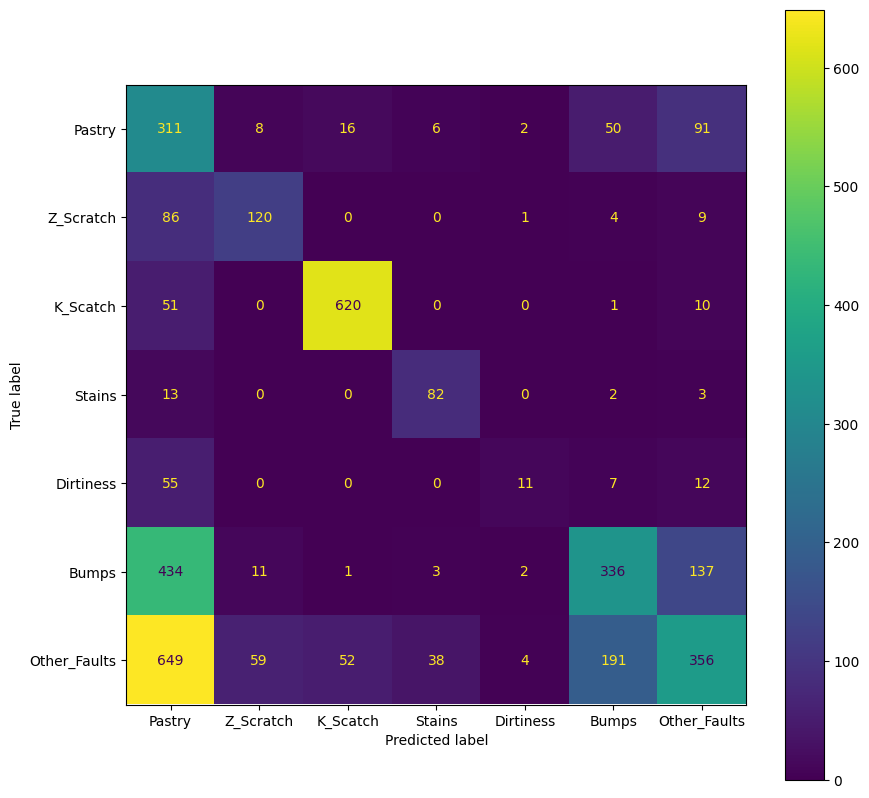

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
print('Confusion matrix')
cm = confusion_matrix(y_val.values.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])
plt.figure(figsize=(10, 10))

# Plot the confusion matrix
disp.plot(ax=plt.gca())  # Use the current axes
plt.show()

In [36]:
type(y_pred)

numpy.ndarray

In [37]:
from sklearn.metrics import roc_curve, auc

n_classes = len(targets) # number of class
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val.values[:,i], y_pred[:,i] )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.to_numpy().ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

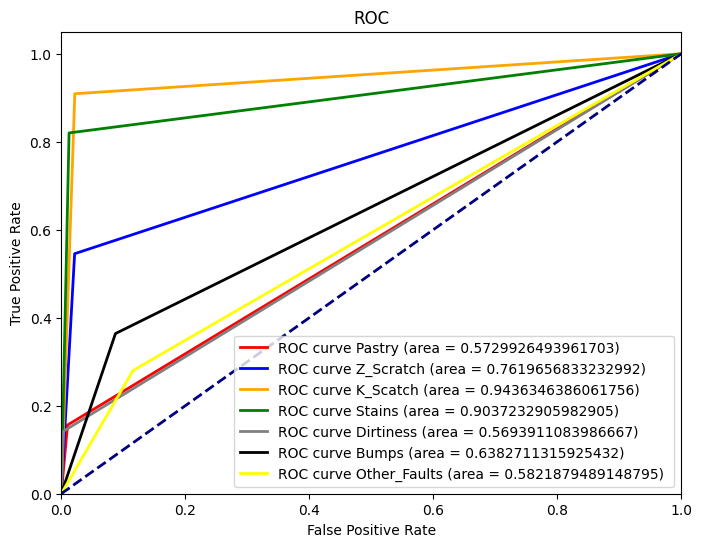

In [38]:
plt.figure(figsize=(8, 6))
lw = 2 # line_width
colors = ['red','blue','orange','green','grey','black','yellow']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             lw=lw, label=f'ROC curve {targets[i]} (area = {roc_auc[i]}) ') 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [39]:
df_test = pd.read_csv("/kaggle/input/playground-series-s4e3/test.csv")

In [40]:
df_test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [41]:
df_test.shape

(12814, 28)

In [42]:
df_test['X_range'] = df_test['X_Maximum'] - df_test['X_Minimum']
df_test['Y_range'] = df_test['Y_Maximum'] - df_test['Y_Minimum']
df_test['Luminosity_range'] = df_test['Maximum_of_Luminosity'] - df_test['Minimum_of_Luminosity']


In [43]:
df_test.shape

(12814, 31)

In [44]:
id = df_test['id']

In [45]:
df_test = df_test.drop(['id'],axis=1)

In [46]:
df_test.shape

(12814, 30)

In [47]:
test_prediction = model.predict_proba(df_test)

In [48]:
X_test_prediction = pd.DataFrame(test_prediction, columns = targets)

In [49]:
submission = pd.concat([id, X_test_prediction],axis = 1)

In [50]:
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.459235,0.000449,0.002265,0.000026,0.021828,0.133244,0.409264
1,19220,0.224950,0.006830,0.002289,0.000177,0.085064,0.100403,0.495422
2,19221,0.001209,0.031545,0.087159,0.000252,0.004355,0.275307,0.419279
3,19222,0.185965,0.000590,0.000167,0.000412,0.005778,0.274352,0.490092
4,19223,0.000619,0.001016,0.000258,0.000305,0.002036,0.646582,0.393218
...,...,...,...,...,...,...,...,...
12809,32028,0.090216,0.041420,0.001337,0.000035,0.015139,0.259456,0.261353
12810,32029,0.341826,0.002044,0.005803,0.002131,0.087715,0.155289,0.448368
12811,32030,0.000324,0.000355,0.921058,0.000173,0.000284,0.000392,0.037239
12812,32031,0.344698,0.002550,0.014531,0.000035,0.019005,0.260590,0.383333


In [51]:
submission.to_csv('submission.csv', index=False)